# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Yair Stolero| yairstolero@gmail.com| 203619341|
|Shlomo Bohadana| shlomobo@campus.technion.ac.il| 036273423|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - Backpropagation By Hand](#-Question-2---Backpropagation-By-Hand)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - MLP and Invaraince](#-Question-5---MLP-and-Invaraince)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Risk $\mathcal{R}(w)$: $$ \mathcal{R}(w) \triangleq \mathbb{E}_{x^{(0)} \sim \mathcal{N}(0, I) } \left[ ||w^Tx^{(0)} - w_t^Tx^{(0)}||^2 \right] $$

Prove:

$$ \mathcal{R}(w) = ||w-w_t||^2 $$

### Question 1 - Solution ###


To prove the given equation, we'll start by expanding the squared Euclidean norm on the right-hand side:

$$
||w - w_t||^2 = (w - w_t)^T(w - w_t) = w^Tw - w^Tw_t - w_t^Tw + w_t^Tw_t.
$$


Next, let's compute the expectation on the left-hand side of the equation:

$$
\mathcal{R}(w) = \mathbb{E}_{x^{(0)} \sim \mathcal{N}(0, I)} \left[ ||w^Tx^{(0)} - w_t^Tx^{(0)}||^2 \right] = \mathbb{E}_{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (w^Tx^{(0)} - w_t^Tx^{(0)})^T(w^Tx^{(0)} - w_t^Tx^{(0)}) \right] = \mathbb{E}_{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w^Tx^{(0)} - (x^{(0)})^Tw w_t^Tx^{(0)} - (x^{(0)})^Tw_t w^Tx^{(0)} + (x^{(0)})^Tw_t w_t^Tx^{(0)} \right].
$$


Now, we can rearrange and simplify the terms inside the expectation:

$$
\mathcal{R}(w) = \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w^Tx^{(0)} - (x^{(0)})^Tw w_t^Tx^{(0)} - (x^{(0)})^Tw_t w^Tx^{(0)} + (x^{(0)})^Tw_t w_t^Tx^{(0)} \right]
= \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w^Tx^{(0)} - (x^{(0)})^Tw w_t^Tx^{(0)} \right] - \mathbb{E}_{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw_t w^Tx^{(0)} - (x^{(0)})^Tw_t w_t^Tx^{(0)} \right].
$$


Note that the terms involving the expectation of the cross-products can be simplified as follows:

$$
\mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w^Tx^{(0)} \right] = w^T \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)}) (x^{(0)})^T \right] w = w^T I w = w^T w = w^Tw.
$$


and

$$
\mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w_t^Tx^{(0)} \right] = w_t^T \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)}) (x^{(0)})^T \right] w = w_t^T I w = w_t^T w = w_t^Tw.
$$


Similarly, the other cross-product terms can be simplified to $w^Tw_t$ and $w_t^Tw_t$.

Substituting these simplifications back into the equation for $\mathcal{R}(w)$, we have:

$$
\mathcal{R}(w) = \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw w^Tx^{(0)} - (x^{(0)})^Tw w_t^Tx^{(0)} \right] - \mathbb{E}{x^{(0)} \sim \mathcal{N}(0, I)} \left[ (x^{(0)})^Tw_t w^Tx^{(0)} - (x^{(0)})^Tw_t w_t^Tx^{(0)} \right] = w^Tw - w^Tw_t - w_t^Tw + w_t^Tw_t = ||w-w_t||^2.
$$


Hence, we have proven that $\mathcal{R}(w) = ||w-w_t||^2$.


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Backpropagation By Hand
---
Consider the following network:
<img src="https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/backprop_by_hand_ex1.png" style="height:300px">

We will work with one sample for this example, but it can be extended to mini-batches.

* Input: $x = \begin{bmatrix} 1 \\ 4 \\ 5 \end{bmatrix} \in \mathbb{R}^3$
* Output (target): $ t = \begin{bmatrix} 0.1 \\ 0.05 \end{bmatrix} \in \mathbb{R}^2 $
* Number of Hidden Layers: 1
* Activation: Sigmoid for both hidden and output layers
* Loss Functions: MSE

We initialize the weights and biases to random values as follows:
<img src="https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/backprop_by_hand_ex2.png" style="height:300px">

1. Perform one forward pass and calculate the MSE.
2. Perform backpropagation (one backward pass, i.e., calculate the gradients).
3. With a learning rate of $\alpha = 0.01$, what are the new values of the weights after performing the forward pass and backward pass (assume we use SGD)?

### Question 2 - Solution ###

1. Forward pass:

We will compute the forward pass using the sigmoid function and the given inputs, weights, and biases:


$
h_1 = \sigma(w_1x_1 + w_3x_2 + w_5x_3 + b_1) = \sigma(0.1 \cdot 1 + 0.3 \cdot 4 + 0.5 \cdot 5 + 0.5) = 0.9866
$

$
h_2 = \sigma(w_2x_1 + w_4x_2 + w_6x_3 + b_1) = \sigma(0.2 \cdot 1 + 0.4 \cdot 4 + 0.6 \cdot 5 + 0.5) = 0.9959
$

$
o_1 = \sigma(w_7h_1 + w_9h_2 + b_2) = \sigma(0.7 \cdot 0.9866 + 0.9 \cdot 0.9959 + 0.5) = 0.8982
$

$
o_2 = \sigma(w_8h_1 + w_10h_2 + b_2) = \sigma(0.8 \cdot 0.9866 + 0.1 \cdot 0.9959 + 0.5) = 0.8005
$

$
\text{MSE} = \frac{1}{2} \left( (o_1 - t_1)^2 + (o_2 - t_2)^2 \right) = \frac{1}{2} \left( (0.8982 - 0.1)^2 + (0.8005 - 0.05)^2 \right) = 0.6009
$

2. Backpropagation:

$ E= \frac{1}{2}((o_1-t_1)^2+(o_2-t_2)^2)$

$\sigma'(x) = \sigma(x)(1-\sigma(x))$

$\frac{\partial E}{\partial o_i} = \frac{\partial\left[ \frac{1}{2}\sum_{j}^{2}{(o_j-t_j)^2}\right]}{\partial o_i} = \frac{1}{2}\cdot 2\cdot (o_i-t_i) = (o_i-t_i) $

*   $\frac{\partial E}{\partial o_1} =(o_1-t_1)=0.8895-0.1=0.789$
*   $\frac{\partial E}{\partial o_2} =(o_2-t_2)=0.8004-0.05=0.75$
*   $\frac{\partial E}{\partial w_7} = \frac{d E}{d o_1}\cdot \frac{d o_1}{d w_7}=$
$ 0.789 \cdot 0.889(1-0.889) \cdot 0.986 = 0.076$

*   $\frac{\partial E}{\partial w_8} = \frac{d E}{d o_2}\cdot \frac{d o_2}{d w_8}=$
$ 0.75 \cdot 0.8004(1-0.8004) \cdot 0.986 = 0.118$

*   $\frac{\partial E}{\partial w_9} = \frac{d E}{d o_1}\cdot \frac{d o_1}{d w_9}=$
$ 0.789 \cdot  0.889(1-0.889) \cdot 0.995 = 0.077$

*   $\frac{\partial E}{\partial w_{10}} = \frac{d E}{d o_2}\cdot \frac{d o_2}{d w_{10}}=$
$ 0.75 \cdot 0.8004(1-0.8004) \cdot 0.995 = 0.119$

*   $\frac{\partial E}{\partial b_2} = \frac{d E}{d o_1}\cdot \frac{d o_1}{d b_2}+\frac{d E}{d o_2}\cdot \frac{d o_2}{d b_2}=$
$0.789 \cdot 0.889(1-0.889) + 0.75 \cdot 0.8004(1-0.8004)= 0.1975$

*   $\frac{\partial E}{\partial h_1} = \frac{d E}{d o_1}\cdot \frac{d o_1}{d h_1}+\frac{d E}{d o_2}\cdot \frac{d o_2}{d h_1}=$
$0.789 \cdot 0.889(1-0.889) \cdot 0.7 + 0.75 \cdot 0.8004(1-0.8004)\cdot 0.8= 0.0865$

*   $\frac{\partial E}{\partial h_2} = \frac{d E}{d o_1}\cdot \frac{d o_1}{d h_2}+\frac{d E}{d o_2}\cdot \frac{d o_2}{d h_2}=$
$0.789 \cdot 0.889(1-0.889) \cdot 0.9 + 0.75 \cdot 0.8004(1-0.8004)\cdot 0.1= 0.074$


*   $\frac{\partial E}{\partial w_1} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_1} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_1}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_1} + \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_1}) =$
$ 0.0776 \cdot(0.7\cdot 0.9866(1-0.9866) \cdot1 ) + 0.1199\cdot ( 0.8\cdot 0.9866(1-0.9866) \cdot1 ) = 1.983 \cdot 10^{-3}$


*   $\frac{\partial E}{\partial w_3} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_3} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_3}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_3} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_3}) =$
$ 0.0776\cdot ( 0.7\cdot 0.0132 \cdot4 ) + 0.1199\cdot ( 0.8\cdot 0.0132 \cdot4 ) = 7.933 \cdot 10^{-3}$


*   $\frac{\partial E}{\partial w_5} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_5} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_5}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_5} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_5}) =$
$0.0776\cdot ( 0.7\cdot 0.9866(1-0.9866) \cdot5 ) + 0.1199\cdot( 0.8\cdot 0.9866(1-0.9866) \cdot5 ) = 9.916\cdot10^{-3}$


*   $\frac{\partial E}{\partial w_2} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_2} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_2}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_2} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_2}) =$
$  0.0776\cdot (0.9\cdot 0.995(1-0.995) \cdot1 ) + 0.1199\cdot ( 0.1\cdot 0.995(1-0.995) \cdot1 ) = 9.487\cdot10^{-4}$

*   $\frac{\partial E}{\partial w_4} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_4} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_4}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_4} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_4}) =$
$   0.0776\cdot ( 0.9\cdot 0.995(1-0.995) \cdot4 ) + 0.1199\cdot ( 0.1\cdot 0.995(1-0.995) \cdot4 ) = 3.795\cdot10^{-3}$

*   $\frac{\partial E}{\partial w_6} =\frac{\partial E}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_6} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_6}) + \frac{\partial E}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial w_6} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial w_6}) =$
$   0.0776\cdot (0.9\cdot 0.995(1-0.995) \cdot5 ) + 0.1199\cdot ( 0.1\cdot 0.995(1-0.995) \cdot5 )= 4.744\cdot10^{-3}$


*   $\frac{\partial E}{\partial b_1}= \frac{\partial L}{\partial o_1}(\frac{\partial o_1}{\partial h_1}\cdot\frac{\partial h_1}{\partial b_1} +  \frac{\partial o_1}{\partial h_2}\cdot\frac{\partial h_2}{\partial b_1}) + \frac{\partial L}{\partial o_2}(\frac{\partial o_2}{\partial h_1}\cdot\frac{\partial h_1}{\partial b_1} +  \frac{\partial o_2}{\partial h_2}\cdot\frac{\partial h_2}{\partial b_1}) =$
$0.0776 \cdot(0.7\cdot 0.9866(1-0.9866) + 0.9 \cdot 0.995(1-0.995))+ 0.1199\cdot(0.8\cdot 0.9866(1-0.9866) + 0.1 \cdot 0.995(1-0.995))= 0.0234\\
\\
\\
$


3.Gradient desect: update rule is $$w_{i,(t+1)} = w_{i,t} - \alpha\cdot\frac{\partial E}{\partial w_i}  
$$and with $\alpha=0.01$
the results are:
$
  w_1 = w_1 - \alpha\cdot\frac{\partial E}{\partial w_1} = 
  0.1 - 0.01\cdot1.983\cdot10^{-3} = 
  0.099980\\
  \\
  \\
  w_2 = w_2 - \alpha\cdot\frac{\partial E}{\partial w_2} = 
  0.2 - 0.01\cdot9.487\cdot10^{-4} = 
  0.19999805\\
  \\
  \\
  w_3 = w_3 - \alpha\cdot\frac{\partial E}{\partial w_3} = 
  0.3 - 0.01\cdot7.933\cdot10^{-3} = 
  0.29992067\\
  \\
  \\
  w_4 = w_4 - \alpha\cdot\frac{\partial E}{\partial w_4} = 
  0.4 - 0.01\cdot3.795\cdot10^{-3} = 
  0.399962\\
  \\
  \\
  w_5 = w_5 - \alpha\cdot\frac{\partial E}{\partial w_5} = 
  0.5 - 0.01\cdot9.916\cdot10^{-3} = 
  0.4999084\\
  \\
  \\
  w_6= w_6 - \alpha\cdot\frac{\partial E}{\partial w_6} = 
  0.6 - 0.01\cdot4.744\cdot10^{-3} = 
  0.59995256\\
  \\
  \\
  w_7= w_7 - \alpha\cdot\frac{\partial E}{\partial w_7} = 
  0.7 - 0.01\cdot0.0766 = 
  0.699234\\
  \\
  \\
  w_8 = w_8 - \alpha\cdot\frac{\partial E}{\partial w_8} = 
  0.8 - 0.01\cdot0.1183 = 
  0.798817\\
  \\
  \\
  w_9 = w_9 - \alpha\cdot\frac{\partial E}{\partial w_9} = 
  0.9 - 0.01\cdot0.0772 = 
  0.899228\\
  \\
  \\
  w_{10} = w_{10} - \alpha\cdot\frac{\partial E}{\partial w_{10}} = 
  0.1 - 0.01\cdot0.1193 = 
  0.098807\\
  \\
  \\
  b_1 = b_1 - \alpha\cdot\frac{\partial E}{\partial b_1} = 
  0.5 - 0.01\cdot0.0234 = 
  0.499766\\
  \\
  \\
  b_2 = b_2 - \alpha\cdot\frac{\partial E}{\partial b_2} = 
  0.5 - 0.01\cdot0.1975 = 
  0.498025\\
  \\
  \\
$



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

### Question 3 - Solution ###


1.



In graph A: Blue line - 200. Green line - 290.

In graph B: Purple line - 10. Light blue line - 12 . Green line - 13.

In graph C: Red line - 80. Light blue line- 1000. Yellow line - No critical point.


2.

In graph A: Sample-wise Non-monotonicity and Model-wise Double Descent. 
As the model size gets bigger, we can see that the model is worse (Model-wise).
Also, both graph present a language translator, but one has more data then the another which shifts the interpolation thresold and cause peak in the tset loss (Sample - wise).

In graph B: Model-wise Double Descent. All graph increase at some point to a certain peak and decrease after as the model gets bigger with bigger width parameter (Classical regime and Modern regime). 

In graph C: Epoch-wise Double Descent. It can be seen the longer training cause increase in the test error. The longer training reverses overfitting.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that 
$$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

### Question 4 - Solution ###

1.

$\sigma_l = \frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}}$

ReLU activation $\varphi(z) = \max(0, z)$. Thus, we need to calculate $\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]$.

$\varphi(z) = \max(0, z)$, so $\varphi^2(z) = \max(0, z)^2$.

$\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right] = \int_{-\infty}^{\infty} \varphi^2(u_{l-1}[j]) p(u_{l-1}[j]) du_{l-1}[j]$, where $p(u_{l-1}[j])$ is the probability density function of $u_{l-1}[j]$.

ReLU activation $u_{l-1}[j] < 0$, $\varphi(u_{l-1}[j]) = 0$

$\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right] = \int_{0}^{\infty} \varphi^2(u_{l-1}[j]) p(u_{l-1}[j]) du_{l-1}[j]$

Under the assumption that the distribution of $W$ is symmetric, the distribution of $u_{l-1}[j]$ is also symmetric.

$\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right] = \frac{1}{2} \int_{-\infty}^{\infty} \varphi^2(u_{l-1}[j]) p(u_{l-1}[j]) du_{l-1}[j]=\frac{1}{2} \int_{0}^{\infty} u_{l-1}[j]^2 p(u_{l-1}[j]) du_{l-1}[j]$


This integral represents the second moment of the symmetric distribution of $u_{l-1}[j]$. Let's denote this second moment as $\sigma_{u_{l-1}[j]}^2$.

$\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right] = \frac{1}{2} \sigma_{u_{l-1}[j]}^2$

$\sigma_l = \frac{1}{\sqrt{\sum_j \frac{1}{2} \sigma_{u_{l-1}[j]}^2}}$

$\sigma_{u_{l-1}[j]}^2$ is the same for all $j$.
Hence, we can rewrite the sum as $\sum_j \sigma_{u_{l-1}[j]}^2 = d_{l-1} \sigma_{u_{l-1}}^2$, where $\sigma_{u_{l-1}}^2$ represents the variance of $u_{l-1}[j]$.

$\sigma_l = \frac{1}{\sqrt{\frac{1}{2} d_{l-1} \sigma_{u_{l-1}}^2}} = \sqrt{\frac{2}{d_{l-1} \sigma_{u_{l-1}}^2}}$

We assume that $\sigma_{u_{l-1}}^2 = 1$.

Hence, we have: $\sigma_l = \sqrt{\frac{2}{d_{l-1}}}$




2.



$\begin{aligned}
\mathbb{E}[\varphi^2(u_{l-1}[j])] &= \int_0^\infty \left(\max(0, u_{l-1}[j])\right)^2 \frac{1}{\sqrt{2\pi}\sigma_{u_{l-1}}} e^{-\frac{u_{l-1}[j]^2}{2\sigma_{u_{l-1}}^2}} du_{l-1}[j].
\end{aligned}$


$\mathbb{E}[\varphi^2(u_{l-1}[j])] = \frac{1}{\sqrt{2\pi}\sigma_{u_{l-1}}} \int_0^\infty (u_{l-1}[j])^2 e^{-2\sigma_{u_{l-1}}^2 u_{l-1}[j]^2} du_{l-1}[j]$

$\mathbb{E}[\varphi^2(u_{l-1}[j])] = \frac{\sqrt{\sigma_{u_{l-1}}}}{\sqrt{2\pi}}\int_0^\infty t^2 e^{-2t^2} dt$

The integral-

$\int_0^\infty t^2 e^{-2t^2} dt = \left[-te^{-2t^2}\right]_0^\infty + \int_0^\infty e^{-2t^2}dt= 0 + \sqrt{\frac{\pi}{2}}=\sqrt{\frac{\pi}{2}}$

so-

$\mathbb{E}[\varphi^2(u_{l-1}[j])] = \frac{\sqrt{\sigma_{u_{l-1}}}}{\sqrt{2\pi}}\sqrt{\frac{\pi}{2}}=\frac{\sqrt{\sigma_{u_{l-1}}}}{2} $

$\sigma_l = \frac{1}{\sqrt{\sum_j \frac{\sqrt{\sigma_{u_{l-1}}}}{2}}}=\sqrt{\frac{2}{d_{l-1} \sigma_{u_{l-1}}}}\overset{(1)}{=}\sqrt{\frac{2}{d_{l-1} }}$

(1)$\sigma^2=1$


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - MLP and Invaraince
---

You have to design an MLP with the following input: DNA sequences of length $d$. The DNA is a sequence of bases, where each base can be one of 4 options: $(C, T, G, A)$. Thus, the input can be described as the following matrix: $$ X \in \mathcal{R}^{4 \times d}, $$ where $X[j,i]$ denotes the measured value of base concentration of the $j^{th}$ base at location $i$. 

The network should output a **binary** classification $y \in \{-1, 1\}$ for a specific property we wish to find. The network will be trained on samples $\{X^{(n)}, y^{(n)} \}_{n=1}^{N}$, with a **logistic loss function**.

First, we will examine a network with 1 hidden layerof size $4 \times d$ and a **LeakyReLU** activation $\phi$: $$ f_w(X) = \sum_{r=1}^{4}\sum_{k=1}^d W_2[r,k]\phi\left(\sum_{j=1}^{4}\sum_{i=1}^d W_1[r, k,j, i]X[j, i] \right),$$ where $w=\{W_1, W_2\}$ are the layers of the weight **tensors**. After training is done, the classification will be done with $\text{sign}(f(X))$.

1. Which invariances exist in the network's parameters?
2. Now, we notice the fact that: the *direction* in which the DNA is scanned is arbitrary. Thus, if for two inputs $X, \tilde{X}$: $$ \forall i,j: \: X[j,i] = \tilde{X}[j, d-i+1], $$ then the two inputs are **equivalent** in their meaning. What constraints should we put on the network's parameters to improve the network's classification performance? Explain why using an **invariant hidden layer** is not optimal.
3. After that, we now recall that the DNA bases come in pairs, and thus if for two inputs $X, \tilde{X}$: $$ \forall i,j : \: X[j,i] = \tilde{X}[(4-j)\text{mod}4 + 1,i] = \tilde{X}[5-j,i], $$ then the two inputs are **equivalent** in their meaning. What constraints should we put on the network's parameters to improve the network's classification performance?
4. We now notice that the measurement process in noisy, each sample $X^{(n)}$ is in arbitrary scale, and thus if for two $X, \tilde{X}$: $$ \forall i,j: \: X[j,i] = c\tilde{X}[j,i], $$ for some constant $c>0$, then the two inputs are **equivalent** in their meaning.
    * (a) For the given network, that **is already trained**, what is the effect of the scale $c$ on the classification result?
    * (b) Can the arbitrary scale hurt the training process? Hint: think what happens to the gradient of each sample.
    * (c) How can use this information to improve the classifier performance?

### Question 5 - Solution ###

1.

There is an invariance of the permutation of the neurons in the hidden layer. For every pair of indexes, the output won't change it we swap between them.

For illustration:

$ W_{2}[r,k] \longleftrightarrow W_{2}[i,j] $


$ W_{1}[i,j,r,k] \longleftrightarrow W_{1}[r,k,i,j] $



2.

The representation in the hidden layer will be considered equivariant to the transformation if applying the transformation to both the input and output of the tensor $W_1$ does not alter the tensor. In other words, the tensor $W_1$ should remain unchanged under the transformation.

We will require the following constraints:

$ \forall i,j,k,r: W_1[r,k,j,i] = W_1[r,d+1-k,j,d+1-i] $

In addition, we want that the output will be invariance for the transformation:

$ \forall r,k: W_2[r,k] = W_2[r,d+1-k] $

The second layer is designed to maintain an equivariant representation, followed immediately by average pooling. In other words, there exists a tensor, denoted as $ \tilde{W}_{2} \in \mathbb{R}^{4 \times d \times 4 \times d} $, which can be defined such that:

$ \forall i,j,k,r: \tilde{W}_{2}[j,i,r,k] = \tilde{W}_{2}[j, d+1-i,r,d+1-k] $

$ W_{2}[k,r] = \frac{1}{2} \sum_{j=1}^{4} \sum_{i=1}^{d} \tilde{W}_{2}[j,i,r,k] $

Then, our constrain is proven:

$ \forall r,k: W_2[r,k] = W_2[r,d+1-k] $

The reason that an invariant hidden layer is not optimal: an invariant hidden layer would treat all positions in the DNA sequence as identical, disregarding the positional information. However, the order and arrangement of bases in the DNA sequence often hold crucial information for certain properties or patterns. Therefore, using an invariant hidden layer would discard this positional information, potentially leading to a loss of important features for classification.

By incorporating equivariance constraints instead of invariance, we strike a balance by considering the symmetry of the DNA sequence while preserving the positional information. This allows the network to capture relevant patterns regardless of the direction of scanning.

3.

To improve the network's classification performance while considering the equivalence of inputs based on the pairs of DNA bases, we can impose additional constraints on the network's parameters. Specifically, we can enforce equivariance with respect to the exchange of paired bases.

If two inputs $X$ and $\tilde{X}$ are equivalent under the exchange of paired bases, we can require the following constraints on the network's parameters:

a) Equivariance of the first layer: The weights $W_1$ should satisfy the following condition: 

$ W_1[r,k,j,i] = W_1[(4-r)mod4+1,k,(4-j)mod4+1,i] = W_1[5-r,k,5-j,i]$

This ensures that the activations of the hidden layer are equivariant to the exchange of paired bases.

b) Equivariance of the second layer: The weights $W_2$ should satisfy the following condition:

$ W_2[r,k] = W_2[(4-r)mod4+1,k] = W_2[5-r,k] $

This ensures that the output of the network remains equivariant to the exchange of paired bases.

By incorporating these additional equivariance constraints, we account for the fact that DNA bases come in pairs. This allows the network to capture patterns and properties that are invariant under the exchange of paired bases.

There constraints are in addition to the constraints mentioned earlier regarding equivariance with respect to the reversal of the DNA sequence.



4.

a) The scale does't affect the clasification result. We can see that $ f(cX) = cf(X) $ so the sign classification doesn't change 
(c is always positive).


b) Due to the fact we use the logistic loss function, the scale can affect the training. The scale will be part of the loss function in the exponent, therfor will still be there in the gradient. This can affect on drastic change on the gradients, therfor large affect on the training. 


c) To improve the classifier performance considering the arbitrary scale, we can apply a normalization or standardization technique to the input data. This process ensures that the input samples have a similar scale, allowing the network to learn more effectively.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$. 
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | 224x224x64  | 1792  | 
| ReLU |  224x224x64 | 0  |
| POOL2|  112x112x64 | 0  |
|CONV3-128 | 112x112x128 | 73856|
|ReLU | 112x112x128 | 0|
| POOL2| 56x56x128  | 0  |
|CONV3-256 | 56x56x256 | 295168|
|ReLU | 56x56x256 | 0|
|CONV3-256 | 56x56x256 | 590080|
|ReLU | 56x56x256 | 0|
| POOL2|  28x28x256 | 0  |
|CONV3-512 | 28x28x512 | 1180160 |
|ReLU | 28x28x512 | 0|
|CONV3-512 | 28x28x512 | 2359808|
|ReLU | 28x28x512 | 0 |
| POOL2|  14x14x512 | 0  |
|CONV3-512 | 14x14x512 | 2359808|
|ReLU | 14x14x512 | 0|
|CONV3-512 | 14x14x512 | 2359808|
|ReLU | 14x14x512 | 0|
| POOL2|  7x7+409x512 | 0  |
| FC-4096|  4096 | 102764544  |
| FC-4096|  4096 | 16781312  |
| FC-1000|  1000 | 4097000  |
| SOFTMAX|  1000 | 0  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

### Question 6 - Solution ###

1. Filled in the above table.
2. 132863336 total parameters.
3.  93.96 %

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [48]:
# imports for the practice (you can add more if you need)
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib notebook
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [49]:
## 1 ##

x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    if torch.isnan(x).any():
        print(f"NaN values encountered in layer {i}")
        break
print(x.mean(), x.std())

NaN values encountered in layer 28
tensor(nan) tensor(nan)


During the matrix-vector multiplication operations, the values in the vector x grew exponentially, resulting in values that went out of the range of representable numbers. Tha's why the mean and std values ara "nan".

Your answers here

In [50]:
## 2 ##

N = 512
x = torch.randn(N)
std_sum = 0.0
for i in range(10000):
    a = torch.randn(N, N)
    y = a @ x
    std_sum += y.pow(2).sum() / N
std = torch.sqrt(std_sum / 10000)
print("Mean:", y.mean())
print("Empirical std:", std)
print("Expected std:", np.sqrt(N))


Mean: tensor(0.5047)
Empirical std: tensor(22.5623)
Expected std: 22.627416997969522


In [51]:
## 3 ##

x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = a @ x
    if torch.isnan(x).any():
        print(f"NaN values encountered in layer {i}")
        break
print(x.mean(), x.std())


tensor(0.0226) tensor(0.4457)


We can see that we finish all the iterations without exploding. This is because we normalize the weight tensor then we get smaller vallues then the unnormalized. This is due to the reduced variance of the weight values.

In [52]:
## 4 ##

x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = torch.tanh(a @ x)
    if torch.isnan(x).any():
        print(f"NaN values encountered in layer {i}")
        break
print(x.mean(), x.std())

tensor(-0.0642) tensor(0.9795)


We can see that the mean got close to 0 and and standard deviation got close to 1, like normal distribution. This is because the activation function tanh() is a symetric function the gives output between -1 to 1.

In [53]:
## 5 ##

def xavier_init(fan_in, fan_out):
    bound = np.sqrt(6 / (fan_in + fan_out) )
    a = torch.Tensor(fan_in, fan_out).uniform_(-bound, bound)
    return a


x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = torch.tanh(a @ x)
    if torch.isnan(x).any():
        print(f"NaN values encountered in layer {i}")
        break
print(x.mean(), x.std())

tensor(-0.0030) tensor(0.0582)


In [55]:
## 6 ##

def kaiming_init(fan_in, fan_out):
    std = np.sqrt(2/fan_in)
    return torch.randn(fan_in, fan_out).normal_(0 , std)


x = torch.randn(512)
for i in range(100):
    a = kaiming_init(512, 512)
    x = torch.relu(a @ x)
    if torch.isnan(x).any():
        print(f"NaN values encountered in layer {i}")
        break
print(x.mean(), x.std())

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = torch.relu(a @ x)
print(x.mean(), x.std())

tensor(0.5406) tensor(0.7847)
tensor(3.7030e-16) tensor(5.3187e-16)


We can see that the use of xavier_init and Relu cause the std to go to zero. That will cause the stopping of the leraning algorithm, also called gradient vanishing.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. 

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
3. Change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy.

In [60]:
## 1 ##


# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [61]:
## 2 ##


# separate to train, test
X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.3, random_state=seed)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [62]:
## 3 ##


# pre-processing and converting labels to integers
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

le = preprocessing.LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
Y_val = le.transform(Y_val)

In [79]:
## 4 ##


# training a Logistic Regression baseline - complete the code with your variables
logstic_model = LogisticRegression(solver='lbfgs')
y_pred = logstic_model.fit(np.vstack((X_train, X_val)), np.concatenate((Y_train, Y_val))).predict(X_test)
print("Number of mislabeled points %d out of %d total points." % (np.count_nonzero(list(np.concatenate((Y_train, Y_val))) != list(y_pred)), X_train.shape[0]))
print("Logistic Regression Model accuracy = "  , logstic_model.score(X_test, Y_test) * 100) 

Number of mislabeled points 1 out of 13314 total points.
Logistic Regression Model accuracy =  79.35506484402384


In [80]:
## 5 ##


# create TensorDataset from numpy arrays

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

# Create TensorDatasets for the train, validation, and test sets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

**The chosen architecture:**


  * 1 Hidden layers
  * 2 FC layers
  * ReLU Activation function on the first layer
  * The input size is feature length 
  * The size of hidden layer is 64
  * The output of output layer is 1
  * Loss function: BCEWithLogitsLoss
  * Optimizer: Adam
  * Learning rate: 0.005
  * Batch size: 128
  * Epochs: 500


In [81]:
## 6 ##


# model, hyoer-paramerters and training

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [118]:
# define hyper-parmeters and create our model
input_size = X_train.shape[1]
hidden_size = 64
output_dim = 1
batch_size = 128
learning_rate = 0.005
num_epochs = 200
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.BCEWithLogitsLoss()
# model
model = MLP(input_size, hidden_size, output_dim).to(device)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [119]:
# combine train and validation sets
X_trainval = torch.cat([X_train_tensor, X_val_tensor])
Y_trainval = torch.cat([Y_train_tensor, Y_val_tensor])

# create TensorDataset
trainval_dataset = TensorDataset(X_trainval, Y_trainval)

# create DataLoader
trainval_loader = DataLoader(trainval_dataset, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [120]:
# training loop for the model
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for features, targets in train_loader:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration
        loss.backward()  # autograd backward to calculate gradients
        optimizer.step()  # apply update to the weights
        epoch_losses.append(loss.item())
    train_losses.append(np.mean(epoch_losses))

    # Calculate validation loss
    model.eval() # put in evaluation mode
    val_loss = 0.0
    with torch.no_grad():
      for features, targets in val_loader:
        features = features.to(device)
        targets = targets.to(device)
        output = model(features)
        val_loss += criterion(output.view(-1), targets)
    val_loss /= len(val_loader)
    val_losses.append(val_loss)


    if epoch % 50 == 0:
        print(f'epoch: {epoch} train loss: {train_losses[-1]} validation loss: {val_losses[-1]}')

epoch: 0 train loss: 0.44044393669991266 validation loss: 0.40227439999580383
epoch: 50 train loss: 0.2891686192403237 validation loss: 0.33242395520210266
epoch: 100 train loss: 0.27251051692735584 validation loss: 0.3437139391899109
epoch: 150 train loss: 0.26258398109958286 validation loss: 0.32861554622650146


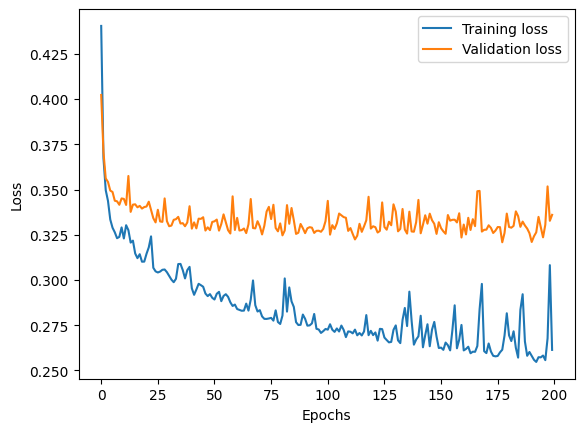

In [121]:
# plot the loss curves


val_losses_cpu = [loss.cpu() for loss in val_losses]

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses_cpu, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [122]:
# evaluate on validation set
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()

    val_acc = 100 * correct / total
    print('Val Accuracy: {:.2f}%'.format(val_acc))

Val Accuracy: 86.44%


In [123]:
# training loop for the model - train + val
loss_total_trainval = []
for epoch in range(num_epochs):
    epoch_losses_tarinval = []
    for features, targets in trainval_loader:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration
        loss.backward()  # autograd backward to calculate gradients
        optimizer.step()  # apply update to the weights
        epoch_losses_tarinval.append(loss.item())
    loss_total_trainval.append(np.mean(epoch_losses_tarinval))
    if epoch % 50 == 0:
        print(f'epoch: {epoch} loss total: {loss_total_trainval[-1]}')

epoch: 0 loss total: 0.26699534033526895
epoch: 50 loss total: 0.2648416897829841
epoch: 100 loss total: 0.2639967642035805
epoch: 150 loss total: 0.26113272101438345


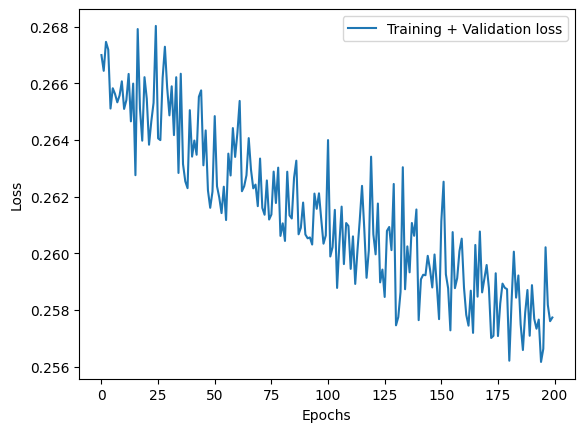

In [124]:
# plot the loss curves
plt.plot(loss_total_trainval, label='Training + Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [125]:
# evaluate on test set
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()

    test_acc = 100 * correct / total
    print('test Accuracy: {:.2f}%'.format(test_acc))

test Accuracy: 89.30%


In [126]:
## 7 ##.


# define the model with weight initialization

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        init.xavier_uniform_(self.fc1.weight)
        self.fc2 = nn.Linear(hidden_size, output_size)
        init.xavier_uniform_(self.fc2.weight)
        self.activation = nn.ReLU()
        self.init_weights()
        
    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(w)
                
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [127]:
# training loop for the model - train + val
for epoch in range(num_epochs):
    epoch_losses_tarinval = []
    for features, targets in trainval_loader:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration
        loss.backward()  # autograd backward to calculate gradients
        optimizer.step()  # apply update to the weights
        epoch_losses_tarinval.append(loss.item())
    if epoch % 50 == 0:
        print(f'epoch: {epoch} loss: {np.mean(epoch_losses_tarinval)}')

epoch: 0 loss: 0.2562101383169158
epoch: 50 loss: 0.25897029730953086
epoch: 100 loss: 0.25695107163501385
epoch: 150 loss: 0.25458968474584465


In [128]:
# evaluate on test set
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()

    test_init_acc = 100 * correct / total
    print('test Accuracy: {:.2f}%'.format(test_acc))
    print('test init Accuracy: {:.2f}%'.format(test_init_acc))
    print('The change in Accuracy: {:.2f}%'.format(test_init_acc - test_acc))

test Accuracy: 89.30%
test init Accuracy: 89.70%
The change in Accuracy: 0.40%


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify house number digits from the **The Street View House Numbers (SVHN)** Dataset. 

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

* 10 classes, 1 for each digit. Digit '0' has label 0, '1' has label 1,...
* 73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data.

<img src="http://ufldl.stanford.edu/housenumbers/32x32eg.png" style="height:250px">

1. Load the SVHN dataset with PyTorch using `torchvision.datasets.SVHN(root, split='train', transform=None, target_transform=None, download=True)`, you can read more here: https://pytorch.org/vision/stable/generated/torchvision.datasets.SVHN.html#torchvision.datasets.SVHN. Display 5 images from the train set.
2. Design a Convolutional Neural Network (CNN) to classify digits from the images.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in Megabytes? (see the convolution tutorial). **Print** these numbers.
3. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * Describe the the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 86% accuracy in this section, and 90% for a full grade.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
4. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1) $$. **Print** the result for each value of $a$.
5. Retrain the classifier, but this time use data augementation of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

In [129]:
## 1 ##


train_data = torchvision.datasets.SVHN(root = "./", split='train', transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.SVHN(root = "./", split='test', transform=torchvision.transforms.ToTensor(), download=True)

train_data, val_data = torch.utils.data.random_split(train_data, [60000, 13257])



100%|██████████| 182040794/182040794 [00:16<00:00, 10839502.87it/s]


100%|██████████| 64275384/64275384 [00:06<00:00, 10038159.76it/s]


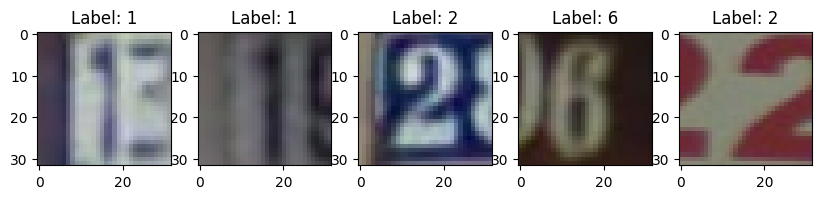

In [130]:
images_to_show = 5

fig, axes = plt.subplots(nrows=1, ncols=images_to_show, figsize=(10, 2))

for i in range(images_to_show):
    idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[idx]

    # Transpose the dimensions of the image
    img = img.permute(1, 2, 0)

    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}")
    
plt.show()

**The chosen architecture:**


 * Total layers: 25
 * Activation function: ReLU
 * Filter sizes: 3 X 3
 * There are Fully-connected layers after the convolution block: The input is 4096 and output 1014 for the first fc, then 1024 to 512, then 512 to 10.
 * Input size: 3 X 32 X 32
 * Output size: 10
 

In [131]:
## 2 ##

class SVHNCNN(nn.Module):
    def __init__(self):
        """CNN Builder."""
        super(SVHNCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2h
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x


In [132]:
## Calcualte number of paramters and weight of the model ##

dummy_input = torch.zeros([1, 3, 32, 32])
dummy_model = SVHNCNN()
dummy_output = dummy_model.conv_layer(dummy_input)
print(dummy_output.shape)
dummy_output = dummy_output.view(dummy_output.size(0), -1)
print(dummy_output.shape)
# how many weights (trainable parameters) we have in our model?
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)


size_model = 0
for param in dummy_model.parameters():
  if param.data.is_floating_point():
    size_model += param.numel() * torch.finfo(param.data.dtype).bits
  else:
    size_model += param.numel() * torch.iinfo(param.data.dtype).bits
print(f"model size: {size_model} / bit | {size_model / 8e6:.2f} / MB")

torch.Size([1, 256, 4, 4])
torch.Size([1, 4096])
num trainable weights:  5852170
model size: 187269440 / bit | 23.41 / MB


**The chosen hyper parameters:**

For the training we splitted the train set into train and validation set, for tunning our model. We tried to change the parameters until we got the best results. The chosen parameters are:

  * Batch size: 128
  * Learning rate: 0.0001 
  * Epochs: 5

<!-- Input: 3x32x32 image
Layer 1: Convolutional layer with 32 filters of size 3x3, stride 1, padding 1
         ReLU activation function
         Batch normalization
         Max pooling with size 2x2 and stride 2
Output: 32x16x16 feature maps
Layer 2: Convolutional layer with 64 filters of size 3x3, stride 1, padding 1
         ReLU activation function
         Batch normalization
         Max pooling with size 2x2 and stride 2
Output: 64x8x8 feature maps
Layer 3: Convolutional layer with 128 filters of size 3x3, stride 1, padding 1
         ReLU activation function
         Batch normalization
         Max pooling with size 2x2 and stride 2
Output: 128x4x4 feature maps
Layer 4: Fully connected layer with 256 units
         ReLU activation function
Output: 256-dimensional vector
Layer 5: Fully connected layer with 10 units (one for each digit class)
         Softmax activation function
Output: 10-dimensional vector of class probabilities


This architecture consists of 3 convolutional layers followed by 2 fully connected layers. The convolutional layers use filters of size 3x3 and ReLU activation function, and are followed by batch normalization and max pooling with size 2x2 and stride 2. The fully connected layers have 256 and 10 units respectively, and use ReLU and softmax activation functions.

The input dimension is 3x32x32, corresponding to the RGB image size of 32x32 pixels. The output dimension is a 10-dimensional vector of class probabilities, representing the likelihood of the input image belonging to each of the 10 digit classes.

To calculate the number of parameters in the network, we need to count the weights of each layer. For the convolutional layers, each filter has 3 channels (corresponding to the RGB input), so the number of parameters in a layer is (filter size * number of channels in previous layer + 1) * number of filters. For example, the first convolutional layer has 32 filters of size 3x3, so it has (3 * 3 * 3 + 1) * 32 = 896 parameters. For the fully connected layers, the number of parameters is (number of units in previous layer + 1) * number of units in current layer. For example, the first fully connected layer has 256 units, so it has (128 * 4 * 4 * 128 + 1) * 256 = 2,097,792 parameters.

The total number of parameters in the network is the sum of the parameters of all layers: 896 + 18,496 + 73,856 + 2,097,792 + 2,570 = 2,191,610. -->

In [133]:
## 3 ##

# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 5

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, shuffle=False)
valloader = torch.utils.data.DataLoader(
    val_data, batch_size=batch_size, shuffle=True)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = SVHNCNN().to(device) 

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [134]:
# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [135]:
# training loop
train_losses = []
val_losses = []
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)
    train_losses.append(running_loss)

    # Calculate validation loss
    model.eval() # put in evaluation mode
    val_loss = 0.0
    with torch.no_grad():
      for i, data in enumerate(valloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).data.item()
    val_loss /= len(valloader)
    val_losses.append(val_loss)

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    val_accuracy, _ = calculate_accuracy(model, valloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    log = "Epoch: {} | Train Loss: {:.4f} | Val Loss: {:.4f} | Training accuracy: {:.3f}% | Validation accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, val_loss, train_accuracy, val_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 5 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/svhn_cnn_ckpt.pth')

print('==> Finished Training ...')

Epoch: 1 | Train Loss: 0.8690 | Val Loss: 0.3986 | Training accuracy: 88.702% | Validation accuracy: 87.855% | Test accuracy: 86.908% | Epoch Time: 53.53 secs
Epoch: 2 | Train Loss: 0.3273 | Val Loss: 0.3000 | Training accuracy: 92.307% | Validation accuracy: 90.941% | Test accuracy: 90.485% | Epoch Time: 52.98 secs
Epoch: 3 | Train Loss: 0.2500 | Val Loss: 0.2595 | Training accuracy: 94.573% | Validation accuracy: 92.427% | Test accuracy: 91.941% | Epoch Time: 51.21 secs
Epoch: 4 | Train Loss: 0.2004 | Val Loss: 0.2352 | Training accuracy: 95.972% | Validation accuracy: 93.151% | Test accuracy: 92.878% | Epoch Time: 52.05 secs
Epoch: 5 | Train Loss: 0.1637 | Val Loss: 0.2387 | Training accuracy: 96.438% | Validation accuracy: 93.196% | Test accuracy: 92.728% | Epoch Time: 51.71 secs
==> Saving model ...
==> Finished Training ...


92.72818070067609


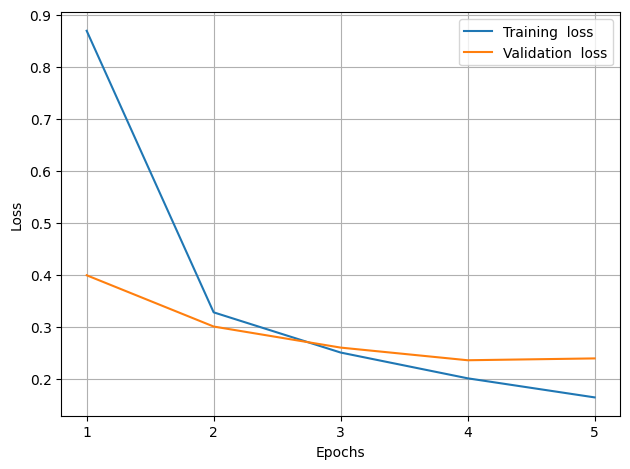

In [136]:
# plot the loss curves
print(test_accuracy)
x_epoch = list(range(1, epochs+1))
plt.plot(x_epoch, train_losses, label='Training  loss')
plt.plot(x_epoch, val_losses, label='Validation  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(x_epoch)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

test accuracy: 92.728%


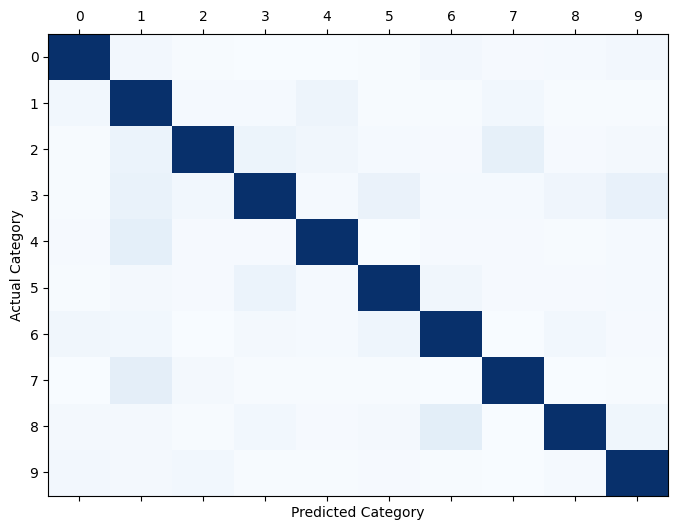

In [137]:
# load model, calculate accuracy and confusion matrix
model = SVHNCNN().to(device)
state = torch.load('./checkpoints/svhn_cnn_ckpt.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

classes = ('0', '1', '2', '3', '4', 
           '5', '6', '7', '8', '9')

# plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [138]:
## 4 ##

a = [0.05, 0.01, 0.005]
# Calculate test set accuracy
test_acc = 0
total_correct = 0
total_images = 0
model.eval()
for value in a:
  with torch.no_grad():
    for i, data in enumerate(testloader):
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)   
      noisy_batch = inputs + value * torch.randn(inputs.shape, device=device)
      output = model(noisy_batch)
      _, predicted = torch.max(output.data, 1)
      total_images += labels.size(0)
      total_correct += (predicted == labels).sum().item()

  model_accuracy = total_correct / total_images * 100
  print("The noisy test acuuracy with value {} : is {:.3f}".format(value, model_accuracy))

The noisy test acuuracy with value 0.05 : is 87.684
The noisy test acuuracy with value 0.01 : is 90.202
The noisy test acuuracy with value 0.005 : is 91.052


In [139]:
## 5 ##

# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 5

transform_train = transforms.Compose([
    transforms.RandomAffine(degrees=25, scale=(0.8,0.8)),
    torchvision.transforms.ColorJitter(brightness=0.6, contrast=0.2, saturation=0.5),
    transforms.ToTensor(),
])



# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
])


# load dataset
train_data_augemented = torchvision.datasets.SVHN(root='./dataset', split='train', 
                                               transform=transform_train, target_transform=None, download=True)
test_data_augemented = torchvision.datasets.SVHN(root='./dataset', split='test', 
                                              transform=transform_test, target_transform=None, download=True)

train_data_augemented, val_data_augemented = torch.utils.data.random_split(train_data_augemented, [60000, 13257])


Using downloaded and verified file: ./dataset/train_32x32.mat
Using downloaded and verified file: ./dataset/test_32x32.mat


In [140]:


# dataloaders - creating batches and shuffling the data
trainloader_augemented = torch.utils.data.DataLoader(
    train_data_augemented, batch_size=batch_size, shuffle=True)
testloader_augemented = torch.utils.data.DataLoader(
    test_data_augemented, batch_size=batch_size, shuffle=False)
valloader_augemented = torch.utils.data.DataLoader(
    val_data_augemented, batch_size=batch_size, shuffle=True)


# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = SVHNCNN().to(device) 

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [141]:
# training loop
train_losses = []
val_losses = []
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader_augemented, 0):
        # get the inputs
        inputs, labels = data

        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader_augemented)
    train_losses.append(running_loss)

    # Calculate validation loss
    model.eval() # put in evaluation mode
    val_loss = 0.0
    with torch.no_grad():
      for i, data in enumerate(valloader_augemented, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        val_loss += criterion(outputs, labels).data.item()
    val_loss /= len(valloader_augemented)
    val_losses.append(val_loss)

    log = "Epoch: {} | Train Loss augemented: {:.4f} | Val Loss augemented: {:.4f} ".format(epoch, running_loss, val_loss)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 5 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/svhn_cnn_ckpt.pth')

print('==> Finished Training ...')

Epoch: 1 | Train Loss augemented: 1.3412 | Val Loss augemented: 0.5909 Epoch Time: 60.82 secs
Epoch: 2 | Train Loss augemented: 0.5305 | Val Loss augemented: 0.4288 Epoch Time: 60.56 secs
Epoch: 3 | Train Loss augemented: 0.4115 | Val Loss augemented: 0.3645 Epoch Time: 60.21 secs
Epoch: 4 | Train Loss augemented: 0.3574 | Val Loss augemented: 0.3315 Epoch Time: 60.27 secs
Epoch: 5 | Train Loss augemented: 0.3228 | Val Loss augemented: 0.3086 Epoch Time: 60.31 secs
==> Saving model ...
==> Finished Training ...


In [142]:
    # Calculate training/test set accuracy of the existing model

    test_accuracy, _ = calculate_accuracy(model, testloader_augemented, device)

    print("Test accuracy: {:.4f}".format(test_accuracy))

Test accuracy: 90.1621


90.16210817455439


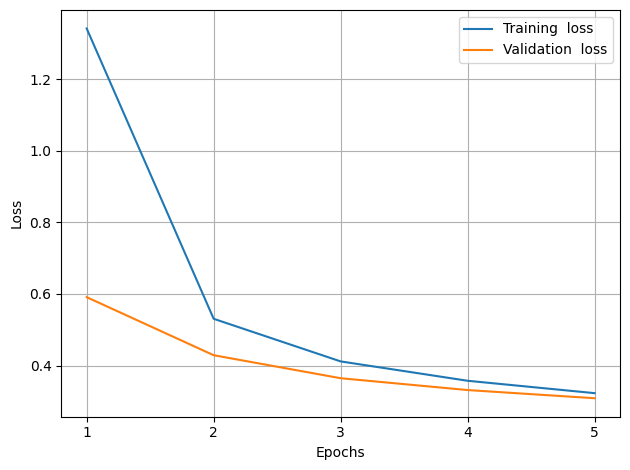

In [143]:
# plot the loss curves
print(test_accuracy)
x_epoch = list(range(1, epochs+1))
plt.plot(x_epoch, train_losses, label='Training  loss')
plt.plot(x_epoch, val_losses, label='Validation  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(x_epoch)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We have tried diffierent kind of augementations, but none of them really improved the accuracy. Eventually, we used RandomAFine which performs affine transformation and ColorJitter that adjust the brightness, contrast and saturation of the image. We also tried to use kornia but this lowered the accuracy to 85%, so we decided to remove it.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/